In [5]:
import re

In [5]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [63]:
#Define file location of downloaded SFR18_2017_Institution_subject_data dataset
SFR_data_fileloc = 'SFR18_2017_Institution_subject_data.csv'
Wiki_UniSize_fileloc = 'UK_University_Enrollment.csv'

In [116]:
#Read Wikipedia data UK_University_Enrollment.csv from Wikipedia into pandas
Wiki_UniSize = pd.read_csv(Wiki_UniSize_fileloc, low_memory=False)

In [117]:
#Convert columns to proper data types
cols = ['Undergraduates', 'Postgraduates', 'TotalStudents']
Wiki_UniSize[cols] = Wiki_UniSize[cols].apply(pd.to_numeric, errors='coerce')

In [118]:
#Remove aggregate universites, University of London and Open University.
Wiki_UniSize_clipped = Wiki_UniSize[(Wiki_UniSize['providerName'] != 'University of London') & (Wiki_UniSize['providerName'] != 'Open University')]
Wiki_UniSize_clipped.head(5)

,Rank,providerName,Undergraduates,Postgraduates,TotalStudents
2,1,Open University in England,94900.0,6590.0,101490
3,2,University of Manchester,27895.0,12590.0,40490
4,3,University College London,18610.0,19295.0,37905
5,4,University of Birmingham,22440.0,12395.0,34835
6,5,University of Leeds,24345.0,8955.0,33300


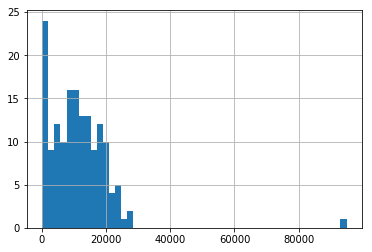

In [123]:
#Create histogram of number of undergraduates 
University_Size_hist = Wiki_UniSize_clipped['Undergraduates'].hist(bins = 50)

In [163]:
#find the number of universities in the 90th percentile
SizeCutoff = Wiki_UniSize_clipped.Undergraduates.quantile(0.9)
Largest_Universities = Wiki_UniSize_clipped[(Wiki_UniSize['Undergraduates'] >= SizeCutoff)]
Largest_Universities.providerName.count()

C:\Users\guynevans\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


16

In [131]:
#determine how many universities account for 50% of the graduates
Total_Undergraduates = Wiki_UniSize_clipped['Undergraduates'].sum()
Total_Undergraduates


166

In [202]:
#determine how many universities account for 50% of the graduates
Bulk_Universities = pd.DataFrame(columns=['providerName', 'Undergraduates'])
Bulk_Universities
Total_Undergraduates = Wiki_UniSize_clipped['Undergraduates'].sum()
Undergraduates_counted = 0  
University_Index = 0    
while Undergraduates_counted < Total_Undergraduates * 0.5:
        University_Name = Wiki_UniSize_clipped['providerName'].iloc[University_Index]
        University_Undergraduates = Wiki_UniSize_clipped['Undergraduates'].iloc[University_Index]
        Bulk_Universities = Bulk_Universities.append({'providerName': University_Name,
                                                      'Undergraduates': University_Undergraduates}, ignore_index=True)
        Undergraduates_counted  = Undergraduates_counted + Wiki_UniSize_clipped['Undergraduates'].iloc[University_Index]
        #print(Undergraduates_counted)
        #print(University_Index)
        University_Index = University_Index + 1

In [166]:
#Read SFR18_2017_Institution_subject_data.csv into pandas
SFR18_2017_Institution_subject_data = pd.read_csv(SFR_data_fileloc, low_memory=False)
#Assign short name 'SFR_data' to database
SFR_data = SFR18_2017_Institution_subject_data
#Check that database has loaded
SFR_data.head()

,UKPRN,providerName,Region,subject,sex,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,...,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
0,10000291,Anglia Ruskin University,East,Agriculture & related subjects,Female,1,30,x,x,x,...,x,x,20,9300,14400,19500,x,x,x,x
1,10007759,Aston University,West Midlands,Agriculture & related subjects,Female,1,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,10000571,Bath Spa University,South West,Agriculture & related subjects,Female,1,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,10007850,The University of Bath,South West,Agriculture & related subjects,Female,1,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4,10007152,University of Bedfordshire,East,Agriculture & related subjects,Female,1,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [192]:
#Convert columns to proper data types
cols = ['grads','lowerAnnEarn' , 'medianAnnEarn', 'upperAnnEarn' , 'prAttBand']
SFR_data[cols] = SFR_data[cols].apply(pd.to_numeric, errors='coerce')

In [313]:
University_Name = 'The University of Cambridge'
University_data_by_subject = pd.DataFrame(columns=['providerName','subject', 'mean_lowerAnnEarn' , 'mean_medianAnnEarn', 'mean_upperAnnEarn' , 'mean_prAttBand'] )
University_data = SFR_data[SFR_data['providerName'] == University_Name]
University_data.head()

,UKPRN,providerName,Region,subject,sex,yearsAfterGraduation,grads,unmatched,matched,activityNotCaptured,...,sustEmp,sustEmpFSorBoth,earningsInclude,lowerAnnEarn,medianAnnEarn,upperAnnEarn,POLARGrpOne,POLARGrpOneIncluded,prAttBand,prAttIncluded
19,10007788,The University of Cambridge,East,Agriculture & related subjects,Female,1,NaN,.,.,.,...,.,.,.,NaN,NaN,NaN,.,.,NaN,.
177,10007788,The University of Cambridge,East,Architecture building & planning,Female,1,25.0,0,25,x,...,x,82.7,15,21800.0,26400.0,30200.0,x,x,1.0,82.7
335,10007788,The University of Cambridge,East,Biological sciences,Female,1,75.0,0.5,70,4.6,...,70.4,88.6,30,20100.0,25800.0,31200.0,x,x,1.0,91.3
493,10007788,The University of Cambridge,East,Business & administrative studies,Female,1,15.0,0,15,x,...,x,59.3,x,NaN,NaN,NaN,x,x,1.0,88.9
651,10007788,The University of Cambridge,East,Combined,Female,1,NaN,.,.,.,...,.,.,.,NaN,NaN,NaN,.,.,NaN,.


In [314]:
University_data_by_subject = pd.DataFrame(columns=['subject', 'mean_lowerAnnEarn' , 'mean_medianAnnEarn', 'mean_upperAnnEarn' , 'mean_prAttBand'] )
SFR_subject_list = SFR_data.subject.unique()
for s in range(len(SFR_subject_list)):
    University_data_by_subject = University_data_by_subject.append(
        {'subject': SFR_subject_list[s],
         'mean_lowerAnnEarn':University_data.groupby('subject')['lowerAnnEarn'].mean()[s],
         'mean_medianAnnEarn': University_data.groupby('subject')['medianAnnEarn'].mean()[s],
         'mean_upperAnnEarn': University_data.groupby('subject')['upperAnnEarn'].mean()[s],
         'mean_prAttBand': University_data.groupby('subject')['prAttBand'].mean()[s],
        }, ignore_index=True)
University_data_by_subject.set_index('subject', inplace=True)
University_data_by_subject.head()

,mean_lowerAnnEarn,mean_medianAnnEarn,mean_upperAnnEarn,mean_prAttBand
subject,,,,
Agriculture & related subjects,NaN,NaN,NaN,NaN
Architecture building & planning,21775.000000,31350.000000,41862.500000,1.0
Biological sciences,25000.000000,32188.888889,43177.777778,1.0
Business & administrative studies,35583.333333,43516.666667,64116.666667,1.0
Combined,NaN,NaN,NaN,NaN


In [269]:
#Calculate stats over all grads in subject 
#need to adjust for number of grads considered in calculation!
SFR_data_by_subject = pd.DataFrame(columns=['subject', 'mean_lowerAnnEarn' , 'mean_medianAnnEarn', 'mean_upperAnnEarn' , 'mean_prAttBand'] )
SFR_subject_list = SFR_data.subject.unique()
for s in range(len(SFR_subject_list)):
    SFR_data_by_subject = SFR_data_by_subject.append(
        {'subject': SFR_subject_list[s],
         'mean_lowerAnnEarn': SFR_data.groupby('subject')['lowerAnnEarn'].mean()[s],
         'mean_medianAnnEarn': SFR_data.groupby('subject')['medianAnnEarn'].mean()[s],
         'mean_upperAnnEarn': SFR_data.groupby('subject')['upperAnnEarn'].mean()[s],
         'mean_prAttBand': SFR_data.groupby('subject')['prAttBand'].mean()[s],
        }, ignore_index=True)
SFR_data_by_subject.set_index('subject', inplace=True)
SFR_data_by_subject = SFR_data_by_subject.sort_values(by = 'mean_medianAnnEarn')

,mean_lowerAnnEarn,mean_medianAnnEarn,mean_upperAnnEarn,mean_prAttBand
subject,,,,
Creative arts & design,11272.579099,17025.886865,22313.039310,1.886090
Mass communications & documentation,14212.268188,19005.706134,23716.690442,1.982055
Psychology,14690.404040,19489.646465,24205.050505,1.882690
Agriculture & related subjects,14885.365854,19538.048780,24071.707317,1.897143
English studies,14682.838710,19650.064516,24496.387097,1.838946
Historical & philosophical studies,14808.977556,20109.226933,25547.880299,1.848870
Biological sciences,15476.569038,20394.769874,25415.376569,1.891582
Combined,15189.215686,21459.803922,27919.607843,1.787234
Social studies (excluding economics),16010.193680,21530.173293,27296.839959,1.888747


Text(0.5,1,'Average Earnings by Subject for \nThe University of Cambridge (orange) \n versus all Universities (blue)')

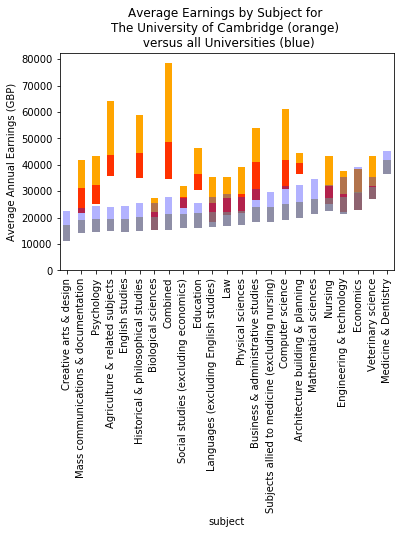

In [315]:
_, ax = plt.subplots()
University_data_by_subject.mean_upperAnnEarn.plot(kind='bar', ax=ax, alpha = 1.0, color= 'orange')
University_data_by_subject.mean_medianAnnEarn.plot(kind='bar', ax=ax, alpha = 0.7, color='red')
University_data_by_subject.mean_lowerAnnEarn.plot(kind='bar', ax=ax, color='white')
SFR_data_by_subject.mean_upperAnnEarn.plot(kind='bar', ax=ax, alpha = 0.3, color= 'b')
SFR_data_by_subject.mean_medianAnnEarn.plot(kind='bar', ax=ax, alpha = 0.7, color='gray')
SFR_data_by_subject.mean_lowerAnnEarn.plot(kind='bar', ax=ax, color='white')
ax.set_ylabel("Average Annual Earnings (GBP)")
plt.title('Average Earnings by Subject for \n' + str(University_Name) + ' (orange) \n versus all Universities (blue)')